# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )




# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
# Print dataset
dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Print dataset shape

print(dataset.shape)



(150, 5)


In [5]:
# Print column names
print(dataset.columns)


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [6]:
# Drop na

dataset.dropna(inplace=True)



3. Encoding the class label categorical column: from string to num


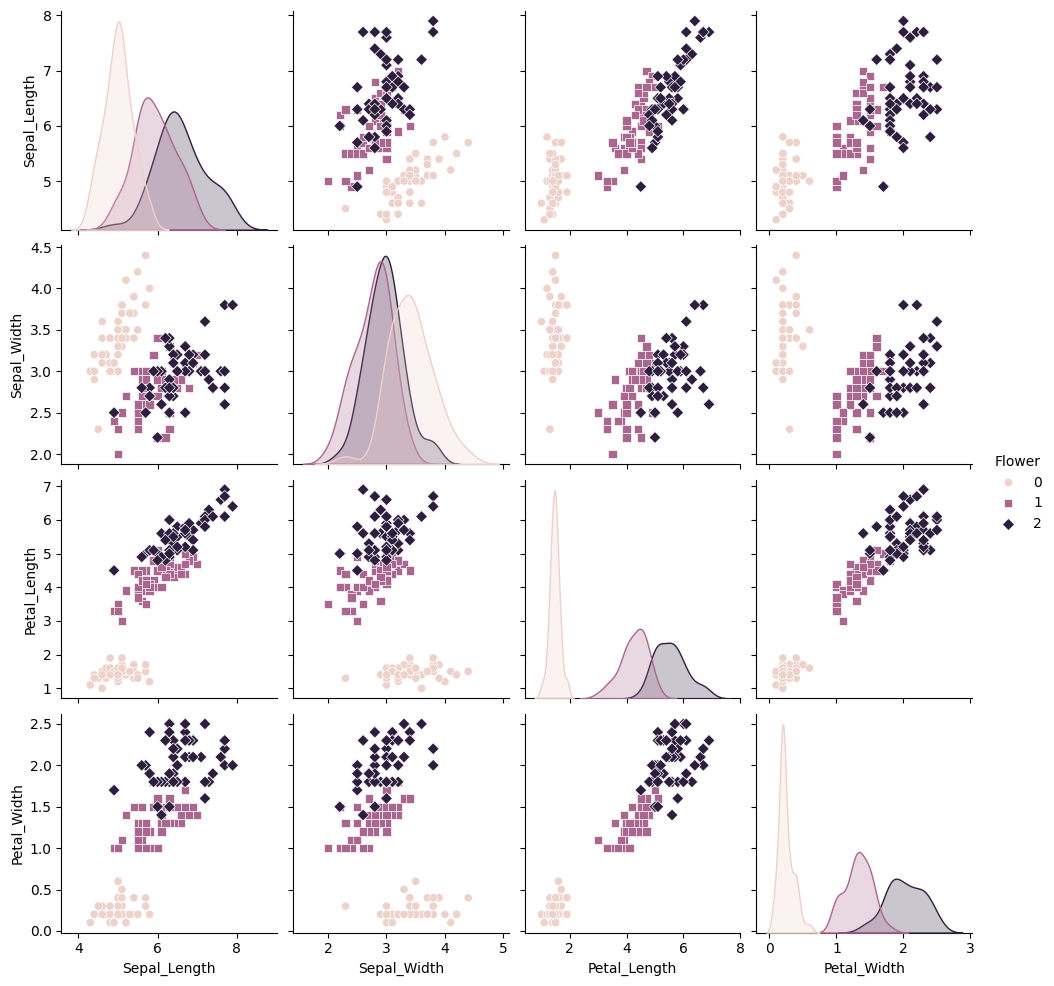

In [7]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset['Flower'] = dataset['Flower'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

# Visualize the dataset
sns.pairplot(dataset, hue='Flower', markers=["o", "s", "D"])
plt.show()


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# Drop out non necesary columns



5. Scatter plot of the data

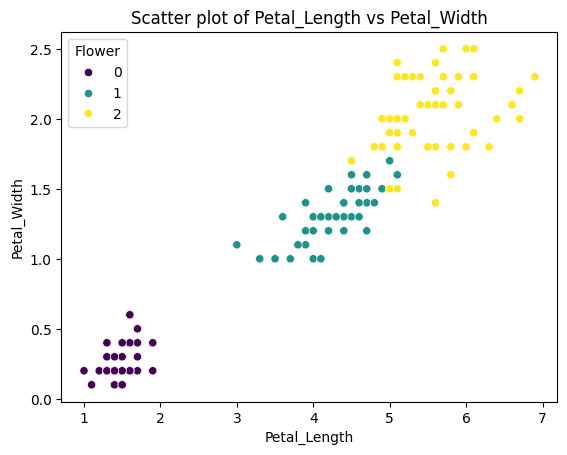

In [8]:
# Scatter plot of Petal_Length vs Petal_Width
sns.scatterplot(data=dataset, x='Petal_Length', y='Petal_Width', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal_Length vs Petal_Width')
plt.show()


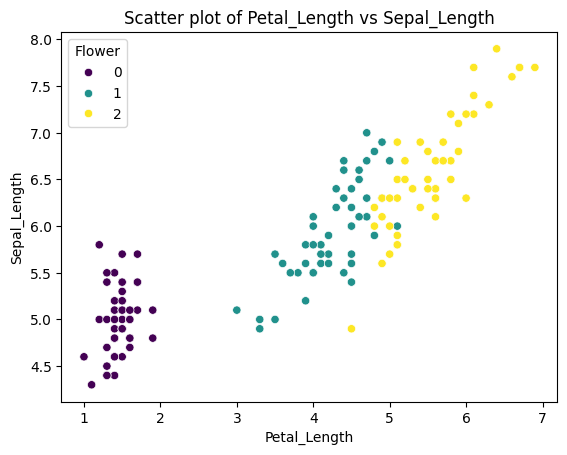

In [9]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(data=dataset, x='Petal_Length', y='Sepal_Length', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal_Length vs Sepal_Length')
plt.show()


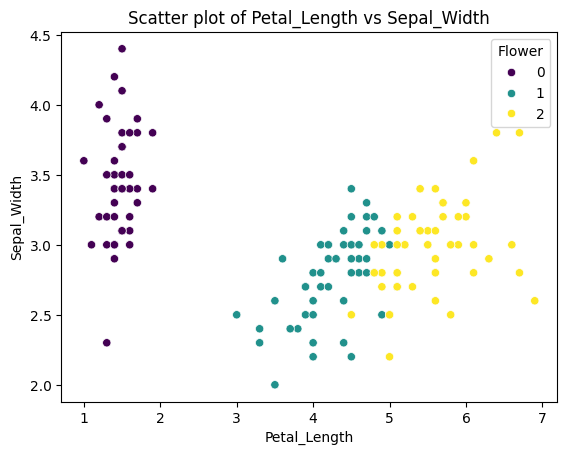

In [10]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(data=dataset, x='Petal_Length', y='Sepal_Width', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal_Length vs Sepal_Width')
plt.show()



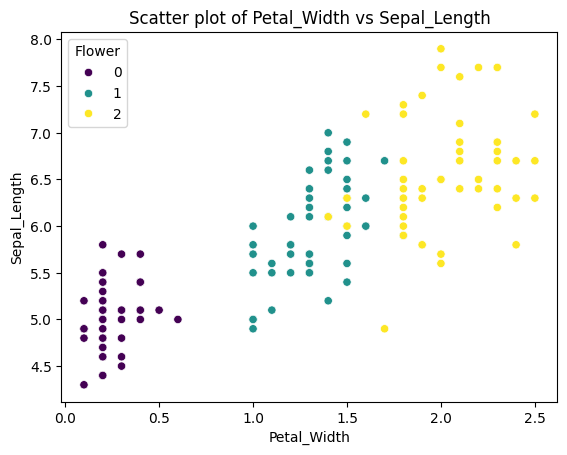

In [11]:
# Scatter plot of Petal_Width vs Sepal_Length
sns.scatterplot(data=dataset, x='Petal_Width', y='Sepal_Length', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal_Width vs Sepal_Length')
plt.show()


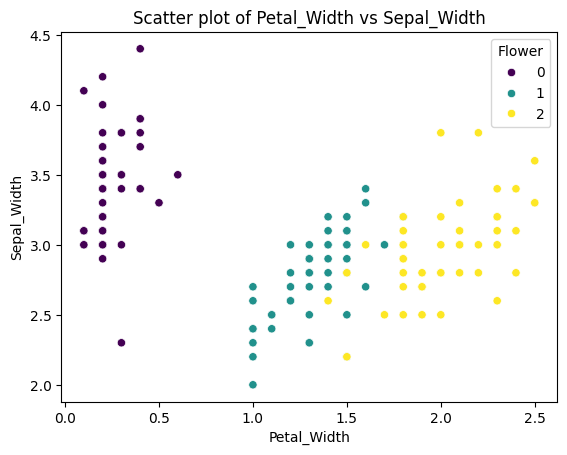

In [12]:
# Scatter plot of Petal_Width vs Sepal_Width
sns.scatterplot(data=dataset, x='Petal_Width', y='Sepal_Width', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal_Width vs Sepal_Width')
plt.show()


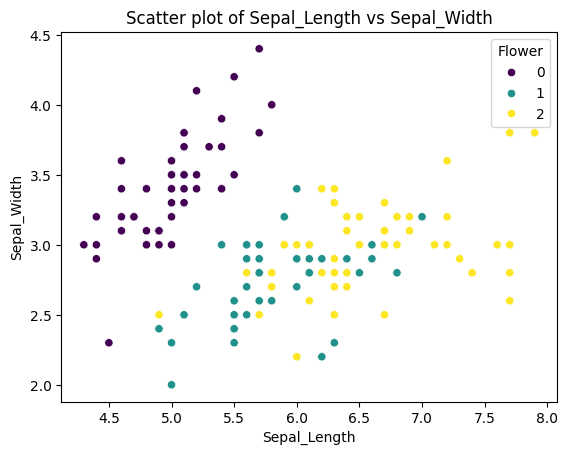

In [13]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(data=dataset, x='Sepal_Length', y='Sepal_Width', hue='Flower', palette='viridis')
plt.title('Scatter plot of Sepal_Length vs Sepal_Width')
plt.show()


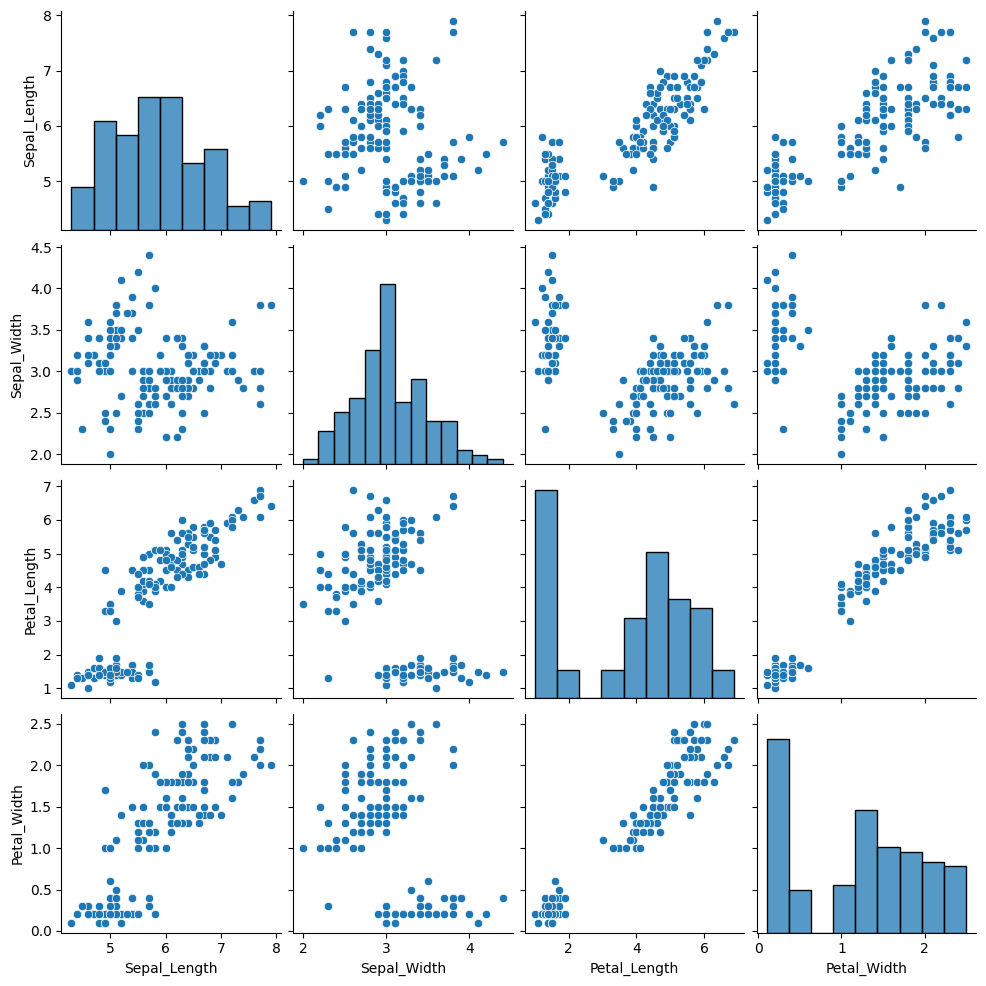

In [22]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset.drop(columns=['Flower']))
plt.show()


In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)




6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [23]:
# Get dataframes for each real cluster
cluster_0 = dataset[dataset['Flower'] == 0]
cluster_1 = dataset[dataset['Flower'] == 1]
cluster_2 = dataset[dataset['Flower'] == 2]

# Display the first few rows of each cluster
print("Cluster 0:")
print(cluster_0.head())
print("\nCluster 1:")
print(cluster_1.head())
print("\nCluster 2:")
print(cluster_2.head())


Cluster 0:
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

Cluster 1:
    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
50           7.0          3.2           4.7          1.4       1
51           6.4          3.2           4.5          1.5       1
52           6.9          3.1           4.9          1.5       1
53           5.5          2.3           4.0          1.3       1
54           6.5          2.8           4.6          1.5       1

Cluster 2:
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
100           6.3          3.3           6.0          2.5       2
101           5.8          2.7           5.1          1.9  

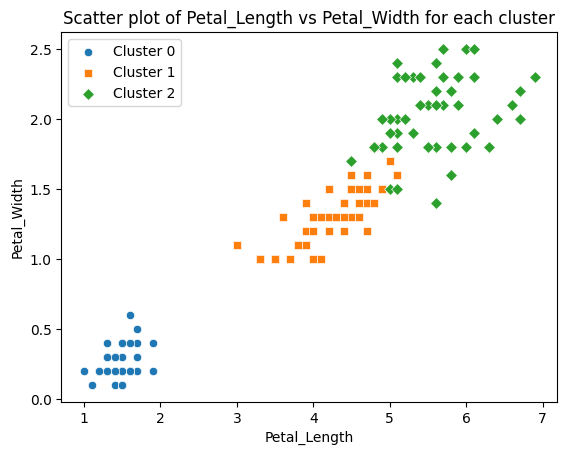

In [24]:
# Scatter plot of each real cluster for Petal
sns.scatterplot(data=cluster_0, x='Petal_Length', y='Petal_Width', label='Cluster 0', marker='o')
sns.scatterplot(data=cluster_1, x='Petal_Length', y='Petal_Width', label='Cluster 1', marker='s')
sns.scatterplot(data=cluster_2, x='Petal_Length', y='Petal_Width', label='Cluster 2', marker='D')
plt.title('Scatter plot of Petal_Length vs Petal_Width for each cluster')
plt.legend()
plt.show()


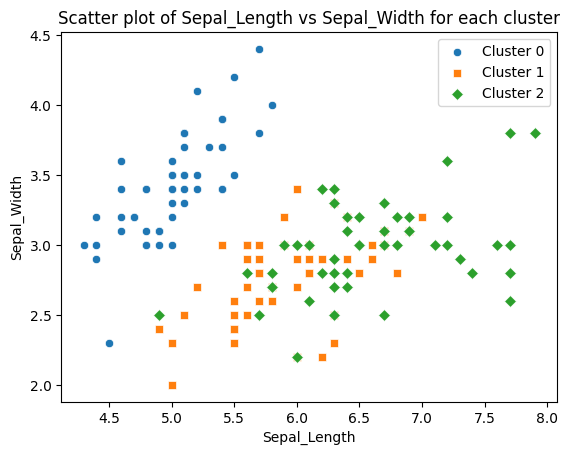

In [25]:
# Scatter plot of each real cluster for Sepal
sns.scatterplot(data=cluster_0, x='Sepal_Length', y='Sepal_Width', label='Cluster 0', marker='o')
sns.scatterplot(data=cluster_1, x='Sepal_Length', y='Sepal_Width', label='Cluster 1', marker='s')
sns.scatterplot(data=cluster_2, x='Sepal_Length', y='Sepal_Width', label='Cluster 2', marker='D')
plt.title('Scatter plot of Sepal_Length vs Sepal_Width for each cluster')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [26]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [27]:
# Understand the data X
print("Shape of X:", X.shape)
print("Data type of X:", X.dtype)
print("First 5 rows of X:\n", X[:5])



Shape of X: (150, 4)
Data type of X: float64
First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [28]:
# Understand the data y
print("Shape of y:", y.shape)
print("Data type of y:", y.dtype)


Shape of y: (150,)
Data type of y: int64
First 5 elements of y: [0 0 0 0 0]


In [29]:
# Calculate the number of observations in the dataset

print("Shape of X:", X.shape)

Shape of X: (150, 4)


In [30]:
# Calculate the number of observations for class 0
num_class_0 = cluster_0.shape[0]
print("Number of observations for class 0:", num_class_0)


Number of observations for class 0: 50


In [32]:
# Calculate the number of observations for class 1

num_class_1 = cluster_1.shape[0]
print("Number of observations for class 1:", num_class_1)

Number of observations for class 1: 50


In [33]:
# Calculate the number of observations for class 2
num_class_2 = cluster_2.shape[0]
print("Number of observations for class 2:", num_class_2)


Number of observations for class 2: 50


# Train a classifier

## Train the classification model

In [34]:


# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression()

# Fit the model to the training data
classifier.fit(X, y)


LogisticRegression()

## Predict the class of a new observation

In [36]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])

# Print the new observation
print("New observation:", xnew)


New observation: [[5.5 3.5 1.5 0.5]]


In [37]:
# Make the prediction using xnew
predicted_class = classifier.predict(xnew)

# Get the predicted class
print("Predicted class:", predicted_class)


Predicted class: [0]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [38]:
from sklearn.model_selection import train_test_split

# Import sklearn train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [39]:
# Number of observations in the train set
num_train_observations = X_train.shape[0]
print("Number of observations in the train set:", num_train_observations)


Number of observations in the train set: 120


In [40]:
# Number of observations of each class in the train set
unique, counts = np.unique(y_train, return_counts=True)
train_class_counts = dict(zip(unique, counts))
print("Number of observations of each class in the train set:", train_class_counts)


Number of observations of each class in the train set: {np.int64(0): np.int64(40), np.int64(1): np.int64(41), np.int64(2): np.int64(39)}


In [41]:
# Number of observations in the test set
num_test_observations = X_test.shape[0]
print("Number of observations in the test set:", num_test_observations)


Number of observations in the test set: 30


In [42]:
# Number of observations of each class in the test set
unique_test, counts_test = np.unique(y_test, return_counts=True)
test_class_counts = dict(zip(unique_test, counts_test))
print("Number of observations of each class in the test set:", test_class_counts)


Number of observations of each class in the test set: {np.int64(0): np.int64(10), np.int64(1): np.int64(9), np.int64(2): np.int64(11)}


## Train the classification model

In [43]:
# Initialize the classifier
classifier = LogisticRegression()

# Fit the model to the training data
classifier.fit(X_train, y_train)


LogisticRegression()

## Test the classification model

In [44]:
# Make the predictions using the test set
y_pred = classifier.predict(X_test)

# Print the predicted classes
print("Predicted classes:", y_pred)


Predicted classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [45]:
# Create a DataFrame to compare real and predicted labels
comparison_df = pd.DataFrame({'Real Label': y_test, 'Predicted Label': y_pred})

# Display the comparison DataFrame
print(comparison_df)


    Real Label  Predicted Label
0            1                1
1            0                0
2            2                2
3            1                1
4            1                1
5            0                0
6            1                1
7            2                2
8            1                1
9            1                1
10           2                2
11           0                0
12           0                0
13           0                0
14           0                0
15           1                1
16           2                2
17           1                1
18           1                1
19           2                2
20           0                0
21           2                2
22           0                0
23           2                2
24           2                2
25           2                2
26           2                2
27           2                2
28           0                0
29           0                0


## Compute the acurracy

In [47]:
from sklearn.metrics import accuracy_score

def compute_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Example usage:
accuracy = compute_accuracy(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [50]:
# Calculate total accuracy
total_accuracy = compute_accuracy(y_test, y_pred)
print("Total Accuracy:", total_accuracy)


Total Accuracy: 1.0


In [52]:
from sklearn.metrics import accuracy_score

# Calculate total accuracy using sklearn.metrics
total_accuracy = accuracy_score(y_test, y_pred)
print("Total Accuracy:", total_accuracy)


Total Accuracy: 1.0


In [53]:
from sklearn.metrics import accuracy_score

# Filter the test set to include only samples of class 0
class_0_indices = (y_test == 0)
y_test_class_0 = y_test[class_0_indices]
y_pred_class_0 = y_pred[class_0_indices]

# Compute accuracy for class 0
accuracy_class_0 = accuracy_score(y_test_class_0, y_pred_class_0)
print("Accuracy for class 0:", accuracy_class_0)


Accuracy for class 0: 1.0


In [54]:
# Filter the test set to include only samples of class 1
class_1_indices = (y_test == 1)
y_test_class_1 = y_test[class_1_indices]
y_pred_class_1 = y_pred[class_1_indices]

# Compute accuracy for class 1
accuracy_class_1 = accuracy_score(y_test_class_1, y_pred_class_1)
print("Accuracy for class 1:", accuracy_class_1)


Accuracy for class 1: 1.0


In [55]:
# Filter the test set to include only samples of class 2
class_2_indices = (y_test == 2)
y_test_class_2 = y_test[class_2_indices]
y_pred_class_2 = y_pred[class_2_indices]

# Compute accuracy for class 2
accuracy_class_2 = accuracy_score(y_test_class_2, y_pred_class_2)
print("Accuracy for class 2:", accuracy_class_2)


Accuracy for class 2: 1.0


## Confussion matrix

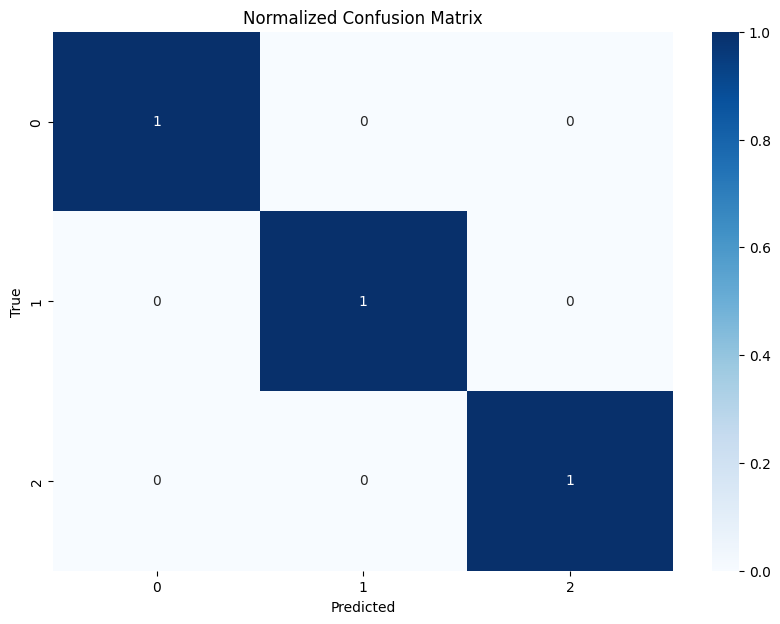

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', xticklabels=unique, yticklabels=unique)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?

A is the better beacuse takes all variables into account

B is the second best because just looking at the charts you can see the clusters are more defined in this variables

C is the worst


2) Using the four variables, try with two classifiers. Which provides the best performance?


Logistic Regression give me a perfect accuaracy
